In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pars = [[0.3, 70.0], [0.3, 68.0], [0.28, 72.0],[0.28, 70.0], [0.28, 68.0], [0.3,72.0]]

In [3]:
gammas = [0]*len(pars); thetas = [0]*len(pars)
for i in range(0,len(pars)):
    thetas[i], gammas[i] = np.loadtxt('./txtfiles/photo_z_test/gamma_IA_est_DESY1_no_fidIA_assumedpar_OmM='+str(pars[i][0])+'_HH0='+str(pars[i][1])+'.txt', unpack=True)

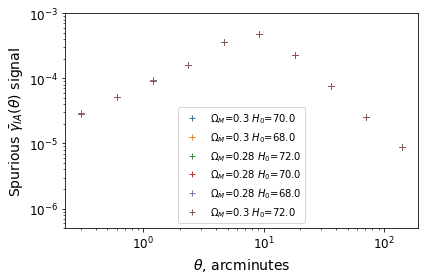

In [4]:
plt.figure()
for i in range(0,len(pars)):
    plt.loglog(thetas[i], gammas[i], '+', label='$\Omega_M$='+str(pars[i][0])+' $H_0$='+str(pars[i][1])+'')
plt.ylabel('Spurious $\\bar{\gamma}_{IA}(\\theta)$ signal', fontsize='14')
plt.xlabel('$\\theta$, arcminutes', fontsize='14')
#plt.title('No IA, vary cosmological parameters')
plt.ylim(5.*10**(-7),10**(-3))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.tight_layout()
plt.savefig('./vary_cosmological_parameters_variableF_higherresdNdz.pdf')

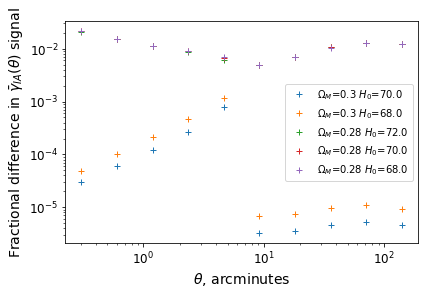

In [5]:
# Fractional difference between the spurious gammat with assuming the right cosmological parameters
# which should only come from the non-thin projection length and the spurious signal with assuming wrong
# cosmological parameters

plt.figure()
for i in range(0,len(pars)-1):
    plt.loglog(thetas[i], np.abs(gammas[i]-gammas[-1])/np.abs(gammas[-1]), '+', label='$\Omega_M$='+str(pars[i][0])+' $H_0$='+str(pars[i][1])+'') 
    #print(np.abs(gammas[i]-gammas[-1])/np.abs(gammas[-1]))
    plt.ylabel('Fractional difference in $\\bar{\gamma}_{IA}(\\theta)$ signal', fontsize='14')
plt.xlabel('$\\theta$, arcminutes', fontsize='14')
#plt.title('No IA, vary cosmological parameters')
#plt.ylim(5.*10**(-7),10**(-1))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.tight_layout()
plt.savefig('./vary_cosmological_parameters_variableF_higherresdNdz_fracdiff.pdf')

In [ ]:
# Probably also want to do some kind of chi^2 test for varying the cosmological parameters
# And indeed from the projection length alone

In [ ]:
# Load data vectors for each case and get the signal to noise.
# Load the covariance in order to do this
data_cov = np.loadtxt('./txtfiles/DESY1_quantities_fromSara/CovMat')
#data_cov_cut = data_cov[1:,1:]
#cut_first_data_point = np.delete(np.delete(data_cov,[0], axis=0), [0], axis=1)
#print(data_cov.shape)
#inv_data_cov_cut = np.linalg.inv(data_cov_cut)
inv_data_cov = np.linalg.inv(data_cov)
gamma_IA_fid = np.loadtxt('./txtfiles/DESY1_quantities_fromSara/GammaIAfinal')

In [ ]:
# Projection length 
diff = gammas[-1] - gamma_IA_fid
#print(diff)
chisquared = np.dot(diff,np.dot(inv_data_cov,diff))
reduced = chisquared / len(gamma_IA_fid)

In [ ]:
print(reduced)

In [ ]:
plt.figure()
plt.errorbar(thetas[-1], gamma_IA_fid, fmt='o',yerr=np.sqrt(np.diag(data_cov)), label="Measurement (orange=negative)")
plt.errorbar(thetas[-1][0], -gamma_IA_fid[0], fmt='o',yerr=np.sqrt(np.diag(data_cov))[0])
plt.plot(thetas[-1], gammas[-1], 'o',label="Spurious signal from projection over lenses")
plt.xlabel('$\\theta$, arcminutes', fontsize='14')
plt.ylabel('$\\bar{\gamma}_{\\rm IA}(\\theta)$', fontsize='14')
plt.yscale('log')
plt.xscale('log')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.tight_layout()
plt.savefig('./projection_length_spurious_signal.png')
plt.show()
             

In [ ]:
# Check how much the reduced chi^2 varies for changes in cosmology

In [ ]:
for i in range(0,len(gammas)):
    diff = gammas[i] - gamma_IA_fid
    chisquared = np.dot(diff,np.dot(inv_data_cov,diff))
    reduced = chisquared / len(gamma_IA_fid)
    print("reduced chisquared=", reduced)